**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


 #### Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [4]:
# write your code here
from sympy import symbols, diff, solve, log, sqrt, pprint
import sympy as sm

# Define the variables and parameters
L, w, tau, kappa, alpha, nu, G, w_tilde = symbols('L w tau kappa alpha nu G w_tilde')

# Define w_tilde
w_tilde = (1 - tau) * w

# Define the constraint
C = kappa + w_tilde * L

# Define the utility function
V = log((C**alpha)*G**(1-alpha)) - nu * L**2 / 2

# Take the derivative of V with respect to L and solve
FOC = diff(V, L)
L_stjerne = sm.solve(FOC, L)[0]

print(FOC)
print(-1*L_stjerne)

optimal_L = solve(FOC, L)[0]

# Define the given optimal labor supply function
optimal_L_given = (-kappa + sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)

# Print the solutions
print("Calculated L*: ")
display(-1*optimal_L)
print("\nGiven L*: ")
display(optimal_L_given)

# Verify if the solutions are the same
if optimal_L.equals(optimal_L_given):
    print('\nThe solutions match.')
else:
    print('\nThe solutions do not match.')

G**(1 - alpha)*G**(alpha - 1)*alpha*w*(1 - tau)/(L*w*(1 - tau) + kappa) - L*nu
-(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))
Calculated L*: 


-(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))


Given L*: 


(-kappa + sqrt(4*alpha*w**2*(1 - tau)**2/nu + kappa**2))/(2*w*(1 - tau))


The solutions do not match.


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

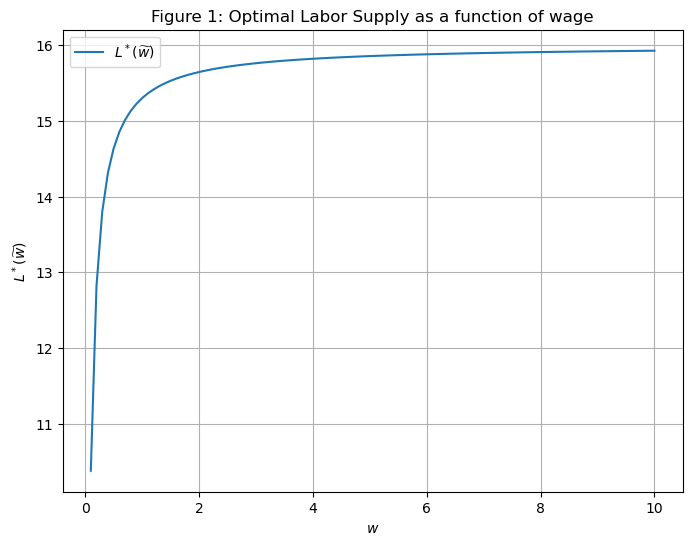

In [5]:
# write your code here
import matplotlib.pyplot as plt
import numpy as np

# Define w_tilde
w_tilde = (1 - tau) * w
# Define parameter values
params = {kappa: 1.0, alpha: 0.5, nu: 1/(2*16**2), tau: 0.30}

# Create a lambda function for optimal L
optimal_L_lamb = sm.lambdify(w, optimal_L.subs(params))

# Create an array of w values
w_values = np.linspace(0.1, 10, 100)  # Adjust the range and the number of points as needed

# Compute corresponding L values
L_values = optimal_L_lamb(w_values)

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(w_values, L_values, label='$L^*(\widetilde{w})$')
plt.xlabel('$w$')
plt.ylabel('$L^*(\widetilde{w})$')
plt.title('Figure 1: Optimal Labor Supply as a function of wage')
plt.legend()
plt.grid(True)
plt.show()

In **Figure 1**, the relationship between the optimal labor hours denoted as $L^{\star}(\tilde{w})$ and the wage, $w$, is depicted. Two key characteristics can be observed:

1) The optimal labor hours, $L^{\star}(\tilde{w})$, increase as the wage, $w$, increases.
2) The function representing $L^{\star}(\tilde{w})$ exhibits concavity.

The concave nature of the function (2) indicates that the optimal labor hours increase with wage, but at a decreasing rate. This behavior is rooted in the utility function, denoted as $V$, which comprises two components: the utility derived from private and public consumption, $ln\left(C^{\alpha}G^{1-\alpha}\right)$, and the disutility from working, $\nu\frac{L^{2}}{2}$. The marginal utility of consuming more diminishes as consumption increases, while the disutility from working increases exponentially with labor hours. As illustrated in Figure 1, this implies that as the wage increases, a relatively larger increase in wage is required per additional unit of optimal labor hour, and eventually, the increase in optimal labor hours becomes almost negligible.


### We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


The code for the three different plots is below. Explanatory text is provided below the figures.

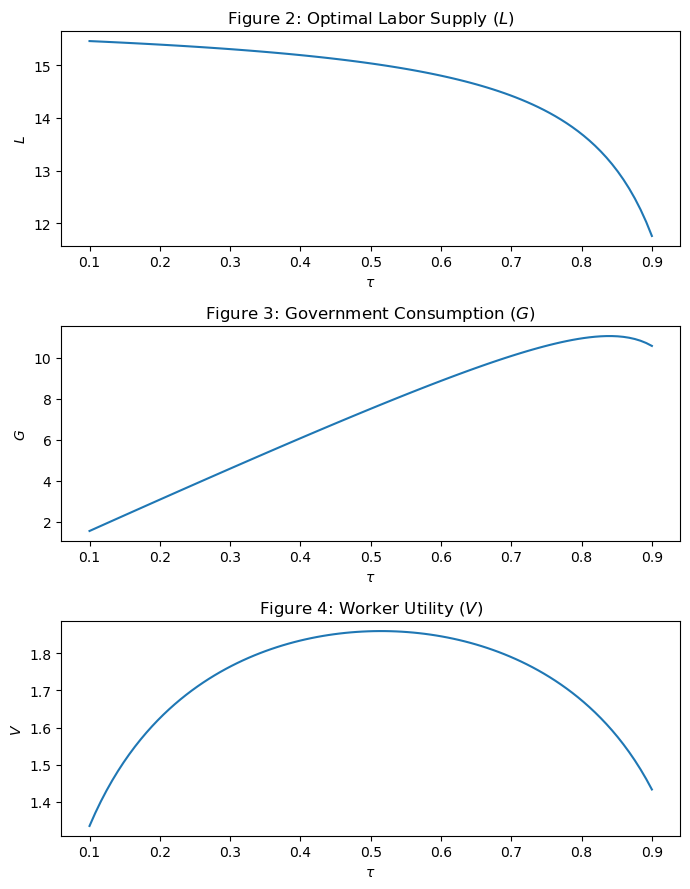

In [27]:
# write your code here
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, log, solve, sqrt

# Define the variables and parameters
L, w, tau, kappa, alpha, nu, G = symbols('L w tau kappa alpha nu G')

# Define the given optimal labor supply function
optimal_L_given = (-kappa + sqrt(kappa**2 + 4 * alpha / nu * ((1 - tau) * w)**2)) / (2 * ((1 - tau) * w))

# Define parameter values
alpha_value = 0.5
kappa_value = 1.0
nu_value = 1 / (2 * 16**2)
w_value = 1.0

# Create arrays of tau values
tau_values = np.linspace(0.1, 0.9, 100)  # Adjust the range and the number of points as needed

# Create empty arrays to store L, G, and V values
L_values = np.zeros_like(tau_values)
G_values = np.zeros_like(tau_values)
V_values = np.zeros_like(tau_values)

# Compute L, G, and V values for each tau value
for i, tau_value in enumerate(tau_values):
    # Compute L using the given optimal labor supply function
    L_values[i] = optimal_L_given.subs({kappa: kappa_value, alpha: alpha_value, nu: nu_value, w: w_value, tau: tau_value}).evalf()

    # Compute G using the equation G = tau * w * L
    G_values[i] = tau_value * w_value * L_values[i]

    # Compute V using the utility function V = log((C**alpha) * (G**(1-alpha))) - nu * L**2 / 2
    C_value = kappa_value + (1 - tau_value) * w_value * L_values[i]
    V_values[i] = log((C_value**alpha_value) * (G_values[i]**(1-alpha_value))) - nu_value * L_values[i]**2 / 2

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(7, 9))

# Plot L vs tau
axs[0].plot(tau_values, L_values)
axs[0].set_xlabel('$\\tau$')
axs[0].set_ylabel('$L$')
axs[0].set_title('Figure 2: Optimal Labor Supply ($L$)')

# Plot G vs tau
axs[1].plot(tau_values, G_values)
axs[1].set_xlabel('$\\tau$')
axs[1].set_ylabel('$G$')
axs[1].set_title('Figure 3: Government Consumption ($G$)')

# Plot V vs tau
axs[2].plot(tau_values, V_values)
axs[2].set_xlabel('$\\tau$')
axs[2].set_ylabel('$V$')
axs[2].set_title('Figure 4: Worker Utility ($V$)')

plt.tight_layout()
plt.show()


Following the 3 figures, displaying labor supply, government consumption, and worker utiltiy as a function of $\tau$, we realize the following
- Figure 1: The optimal labor supply is decreasing in $\tau$. This is because when $\tau\uparrow$, the disponible income decreases, leading to a lower amount of utility obtained from working, reducing the incentive to work.
- Figure 2: Government consumption is increasing in $\tau$. This is very intuitively, as $\tau$ is the tax-rate which generates the government income, and therefore they can afford more expenditures for public consumption provided for individuals.
- Figure 3: Display a figure which proves that changes in $\tau$ has conflicting mechanisms. Firstly, when inceasing $\tau$, the government can afford more G, which directly affects the worker utility. This is associated with a diminisihing utility, implying that for every extra unit of govnerment income, and thereby G, the gain in utiltiy diminishes. Combined with this, the $\tau$ also has a direct effect on the workers incentive to work. When $\tau$ increases, the disponible income of the worker decreases, implying that they can afford less private consumption goods. As $\tau$ increases, this effect increases, because of diminishing return on utility. It is clear, that when $\tau>1$, the negative effects on utiltiy dominates the positive, implying that utiltiy is decreasing in around $\tau \in [0.5;1]$

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [ ]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [14]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [15]:
# write your code here